## Guided Capstone Step 6. Documentation

The Data Science Method

1.Problem Identification

2.Data Wrangling

3.Exploratory Data Analysis

4.Pre-processing and Training Data Development

5.Modeling

6.Documentation
* Review the Results
* Finalize Code
* Finalize Documentation
* Create a Project Report
* Create a Slide Deck for the Executive Audience


In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5.

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('data/step3_output.csv', index_col='Unnamed: 0')
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,Hilltop Ski Area,Alaska,2090,294,0.0,0.0,0.0,0,0,1,...,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.000000,0
4,Sunrise Park Resort,Arizona,11100,1800,0.0,0.0,0.0,1,2,3,...,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.000000,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0.0,0.0,0.0,0,0,1,...,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,100.395722,1
10,Donner Ski Ranch,California,8012,750,0.0,0.0,0.0,0,0,1,...,505.0,60.000000,163.000000,82.0,400.0,75.000000,75.00000,170.0,100.395722,1
12,June Mountain,California,10090,2590,0.0,0.0,0.0,2,0,0,...,1500.0,174.873239,115.103943,58.0,250.0,57.916957,64.16681,128.0,100.395722,1


## Fit Models with Training Dataset

Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.

#### Best Model

In [3]:
X = df.drop(['Name', 'state', 'summit_elev', 'AdultWeekend'], axis=1)

In [4]:
 y = df['AdultWeekend'] # selecting response variable

In [5]:
scaler = preprocessing.StandardScaler().fit(X) # creating a scaler

In [6]:
 X_scaled=scaler.transform(X) # scaling explanatory variables

In [7]:
 X.info() # making sure everything is in order

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 2 to 329
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vertical_drop      165 non-null    int64  
 1   trams              165 non-null    float64
 2   fastEight          165 non-null    float64
 3   fastSixes          165 non-null    float64
 4   fastQuads          165 non-null    int64  
 5   quad               165 non-null    int64  
 6   triple             165 non-null    int64  
 7   double             165 non-null    int64  
 8   surface            165 non-null    int64  
 9   total_chairs       165 non-null    int64  
 10  Runs               165 non-null    float64
 11  TerrainParks       165 non-null    float64
 12  LongestRun_mi      165 non-null    float64
 13  SkiableTerrain_ac  165 non-null    float64
 14  Snow Making_ac     165 non-null    float64
 15  daysOpenLastYear   165 non-null    float64
 16  yearsOpen          165 non

In [8]:
y = y.ravel() # flattening y array

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) # selecting training sets

In [10]:
lm = linear_model.LinearRegression() # selecting model type: linear Regression

In [11]:
model = lm.fit(X_train,y_train) # Runing the model in our training set

In [12]:
y_pred = model.predict(X_test) # predicting the response variable: Adult Weekend Prices

In [13]:
var_score2 = explained_variance_score(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
var_score2, mae2 # printing model performance indicators

(0.5888760458066826, 6.847870429247384)

In [14]:
intercept2 = lm.intercept_
intercept2 # printing the predicted Adult Weekend Price with all other variables being equal

56.37106827594836

In [15]:
coeffs2 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeffs2.sort_values('Coefficient', ascending=False).head(10) 
# printing top ten most relevant features impacting Adult Weekend Prices

,Coefficient
AdultWeekday,11.414365
averageSnowfall,2.639338
vertical_drop,2.339447
daysOpenLastYear,2.025792
SkiableTerrain_ac,1.697329
double,1.159907
clusters,1.123829
quad,1.083022
surface,1.015996
projectedDaysOpen,0.905010


## Review the results

Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the AdultWeekend lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching

In [16]:
big_mountain = df[df['Name'].str.contains('Big Mountain')]
big_mountain # There is no 'Big Mountain' row

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters


**<font color='red'> It seems that Big Mountain Resort was dropped in step three along with other outlier values. At this point I will run the model with the original dataframe (removing some outliers manually) and see if it works.</font>**

In [17]:
dfo = pd.read_csv('data/step3_output_outliers.csv', index_col='Unnamed: 0')
dfo.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               320 non-null    object 
 1   state              320 non-null    object 
 2   summit_elev        320 non-null    int64  
 3   vertical_drop      320 non-null    int64  
 4   trams              320 non-null    float64
 5   fastSixes          320 non-null    float64
 6   fastQuads          320 non-null    int64  
 7   quad               320 non-null    int64  
 8   triple             320 non-null    int64  
 9   double             320 non-null    int64  
 10  surface            320 non-null    int64  
 11  total_chairs       320 non-null    int64  
 12  Runs               320 non-null    float64
 13  TerrainParks       320 non-null    float64
 14  LongestRun_mi      320 non-null    float64
 15  SkiableTerrain_ac  320 non-null    float64
 16  Snow Making_ac     320 non

In [18]:
# Removing 'AdultWeekday', 'daysOpenLastYear' and 'projectedDaysOpen'
X = dfo.drop(['Name', 'state', 'summit_elev', 'AdultWeekend', 'AdultWeekday', 'total_chairs'], axis=1)

In [19]:
y_wknd = dfo['AdultWeekend'] # selecting response variable 'AdultWeekend'

In [20]:
y_wkdy = dfo['AdultWeekday'] # selecting response variable 'AdultWeekday'

In [21]:
scaler = preprocessing.StandardScaler().fit(X) # creating a scaler

In [22]:
X_scaled=scaler.transform(X) # scaling explanatory variables

In [23]:
X.info() # making sure everything is in order

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 329
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vertical_drop      320 non-null    int64  
 1   trams              320 non-null    float64
 2   fastSixes          320 non-null    float64
 3   fastQuads          320 non-null    int64  
 4   quad               320 non-null    int64  
 5   triple             320 non-null    int64  
 6   double             320 non-null    int64  
 7   surface            320 non-null    int64  
 8   Runs               320 non-null    float64
 9   TerrainParks       320 non-null    float64
 10  LongestRun_mi      320 non-null    float64
 11  SkiableTerrain_ac  320 non-null    float64
 12  Snow Making_ac     320 non-null    float64
 13  daysOpenLastYear   320 non-null    float64
 14  yearsOpen          320 non-null    float64
 15  averageSnowfall    320 non-null    float64
 16  projectedDaysOpen  320 non

In [24]:
y_wknd = y_wknd.ravel() # flattening y array 'AdultWeekend'

In [25]:
y_wkdy = y_wkdy.ravel() # flattening y array 'AdultWeekday'

In [26]:
# Training for 'AdultWeekend'
X_train_wknd, X_test_wknd, y_train_wknd, y_test_wknd = train_test_split(X_scaled, y_wknd, test_size=0.25, random_state=1) 

In [27]:
# Training for 'AdultWeekday'
X_train_wkdy, X_test_wkdy, y_train_wkdy, y_test_wkdy = train_test_split(X_scaled, y_wkdy, test_size=0.25, random_state=1)

In [28]:
lm = linear_model.LinearRegression() # selecting model type: linear Regression

In [29]:
model1 = lm.fit(X_train_wknd,y_train_wknd) # fitting the model in our training set for Adult Weekend Prices

In [30]:
model2 = lm.fit(X_train_wkdy,y_train_wkdy) # fitting the model in our training set for Adult Weekday Prices

In [31]:
y_pred_wknd = model1.predict(X_test_wknd) # predicting the response variable: Adult Weekend Prices

In [32]:
y_pred_wkdy = model2.predict(X_test_wkdy) # predicting the response variable: Adult Weekday Prices

In [33]:
var_score2 = explained_variance_score(y_test_wknd, y_pred_wknd)
mae2 = mean_absolute_error(y_test_wknd, y_pred_wknd)

var_score2, mae2 # printing model performance indicators for model 1

(0.4140892080199099, 13.347577749138804)

In [34]:
var_score3 = explained_variance_score(y_test_wkdy, y_pred_wkdy)
mae3 = mean_absolute_error(y_test_wkdy, y_pred_wkdy)

var_score3, mae3 # printing model performance indicators for model 2

(0.3805503844954702, 13.039989506022659)

It seems that the model fitted to predict weekend prices is slightly more accurate that the one to predict weekday prices, thus we will continue with the former because weekend and weekday prices are the same for Big Mountain Resort as you can see below.

In [35]:
intercept2 = lm.intercept_
intercept2 # printing the predicted Adult Weekend Price with all other variables being equal

56.90705633213572

In [36]:
coeffs2 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeffs2.sort_values('Coefficient', ascending=False).head(10) 
# printing top ten most relevant features impacting Adult Weekend Prices

,Coefficient
vertical_drop,6.771018
fastQuads,5.348625
surface,4.234449
SkiableTerrain_ac,3.974524
daysOpenLastYear,3.628769
quad,3.202437
Runs,2.779526
averageSnowfall,1.994039
fastSixes,1.991903
triple,1.824579


In [37]:
big_mountain = dfo[dfo['Name'].str.contains('Big Mountain')]
big_mountain

,Name,state,summit_elev,vertical_drop,trams,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0.0,0.0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


In [38]:
big_mountain['AdultWeekend'], big_mountain['AdultWeekday']

(151    81.0
 Name: AdultWeekend, dtype: float64,
 151    81.0
 Name: AdultWeekday, dtype: float64)

Prepare the Big Mountain resort data row as in the model fitting stage.

In [39]:
X_big_mountain = big_mountain.drop(['Name', 'state', 'summit_elev', 'AdultWeekend', 'AdultWeekday', 'total_chairs'], axis=1)
X_big_mountain_scaled = scaler.transform(X_big_mountain) # scaling explanatory variables

Predict the Big Mountain resort Adult Weekend price and print it out. This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [40]:
# predicting the response variable for Big Mountain: Adult Weekend Prices

y_pred_big_mountain = model1.predict(X_big_mountain_scaled) 
print(y_pred_big_mountain)

[87.06292298]


In [41]:
#Print the Big Mountain resort actual Adult Weekend price.
print(big_mountain['AdultWeekend'])

151    81.0
Name: AdultWeekend, dtype: float64


#### As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.

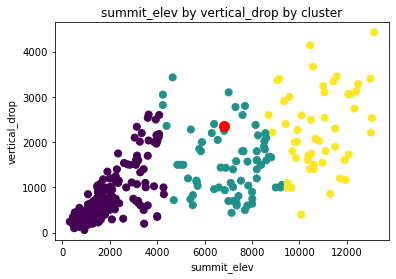

In [42]:
plt.scatter(dfo['summit_elev'], dfo['vertical_drop'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['summit_elev'], big_mountain['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

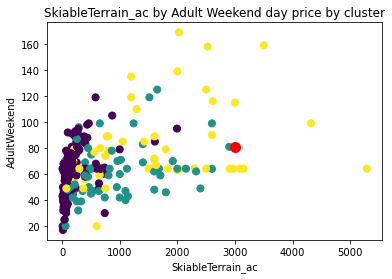

In [43]:
plt.scatter(dfo['SkiableTerrain_ac'], dfo['AdultWeekend'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['SkiableTerrain_ac'], big_mountain['AdultWeekend'], c='red', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekend')
plt.title('SkiableTerrain_ac by Adult Weekend day price by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

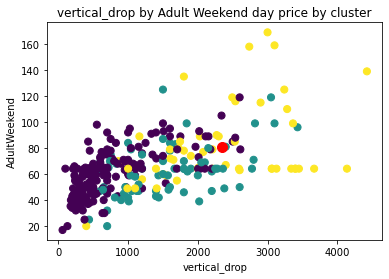

In [44]:
plt.scatter(dfo['vertical_drop'], dfo['AdultWeekend'], c=dfo['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(big_mountain['vertical_drop'], big_mountain['AdultWeekend'], c='red', s=100)
plt.xlabel('vertical_drop')
plt.ylabel('AdultWeekend')
plt.title('vertical_drop by Adult Weekend day price by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

Now, what would happen to day pass prices if you add a new liftchair, i.e. a fastQuad?:

In [45]:
X_big_mountain['fastQuads'] = X_big_mountain['fastQuads'] + 1 # adding a new fast quad lift chair
X_big_mountain_scaled = scaler.transform(X_big_mountain) # scaling again

In [46]:
y_pred_big_mountain = model1.predict(X_big_mountain_scaled) 
print(y_pred_big_mountain)

[89.82219776]


#### It is observed  that prices increaased to 92.5 from 87 ie 5.5 dollar

## Finalize Code 

Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale. Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.

In [47]:
import pickle
s = pickle.dumps(model1)
from joblib import dump, load
dump(model1,  'models/regression_model_adultweekend.joblib')

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.

In [48]:
performance_metrics = {'R_squared':var_score2, 'mean_abs_error':mae2}
model_performance = pd.DataFrame(performance_metrics, index=[0])
model_performance

,R_squared,mean_abs_error
0,0.414089,13.347578


In [49]:
coeffs2.to_csv('data/model_coefficients.csv')
model_performance.to_csv('data/model_performance.csv')